In [1]:
import sys
sys.path.append('/mnt/d/ariel2/code/core/')
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
import ariel_load
import tqdm

local


In [2]:
%%time
train_data = kgs.load_all_train_data()
test_data = kgs.load_all_test_data()
len(train_data), len(test_data)

CPU times: user 540 ms, sys: 87 ms, total: 627 ms
Wall time: 1.93 s


(1100, 1)

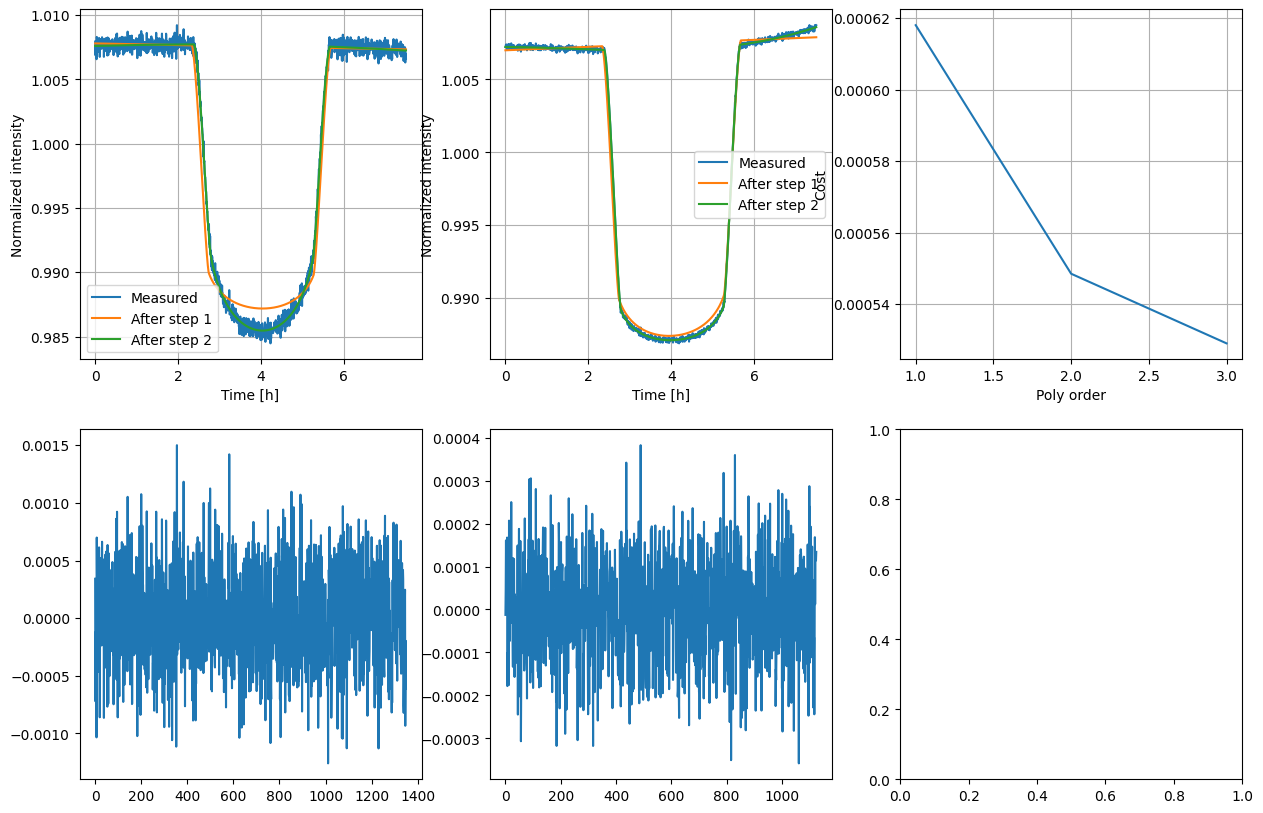

A 9.251712269929797
B 9.226708160057434
C 9.251712269929797
D 9.226708160057434
Score:          -13.4984
RMS error FGS:  28.60 ppm
RMS error AIRS: 318.94 ppm
Score:          -1.2686
RMS error FGS:  155.37 ppm
RMS error AIRS: 374.45 ppm
CPU times: user 34.9 s, sys: 3.72 s, total: 38.6 s
Wall time: 10.4 s


(-1.2685788554206925, 0.00015537285070383808, 0.0003744514151032375)

In [18]:
%%time
import gp
import ariel_gp
kgs.profiling=False
kgs.debugging_mode=1
importlib.reload(gp)
importlib.reload(ariel_gp)
model = ariel_gp.PredictionModel()  
model.run_in_parallel=False
model.model_options.n_iter = 1
model.starter_model.do_plots = True
model.plot_final = False
model.train(train_data)
model.starter_model.loaders[0].cache_steps = [5]
model.loaders[0].cache_steps = []
data = train_data[11:12]
data = train_data[:1]
inferred_data = model.infer(data)
kgs.score_metric(inferred_data, data)
model.starter_model.do_plots = False
inferred_data_simple = model.starter_model.infer(data)
kgs.score_metric(inferred_data_simple, data)

In [19]:
np.std(model.results['model_samples'].m['signal'].m['transit'].get_parameters(),1)

array([1.90566953e-02, 7.47942456e-01, 4.11893066e-01, 4.11245967e-01,
       4.12617032e-01, 4.06595898e-01, 3.92868866e-01, 3.86864480e-01,
       3.92124633e-01, 4.02212452e-01, 4.14830380e-01, 4.27077501e-01,
       4.28867821e-01, 4.19998364e-01, 4.07663541e-01, 3.94894831e-01,
       3.79291763e-01, 3.69635803e-01, 3.73396937e-01, 3.83140801e-01,
       3.91184577e-01, 4.00981046e-01, 4.02810616e-01, 3.93959764e-01,
       3.91633197e-01, 3.92015102e-01, 3.85187450e-01, 3.81606651e-01,
       3.91097431e-01, 4.08517217e-01, 4.13523126e-01, 3.99790970e-01,
       3.86421415e-01, 3.73168581e-01, 3.68701148e-01, 3.74685710e-01,
       3.76509145e-01, 3.76640998e-01, 3.81600309e-01, 3.88263077e-01,
       3.88996605e-01, 3.88374635e-01, 3.92508208e-01, 3.94048177e-01,
       3.86302177e-01, 3.72188154e-01, 3.57313088e-01, 3.52902702e-01,
       3.63882043e-01, 3.79404251e-01, 3.90650157e-01, 4.00828968e-01,
       4.05097437e-01, 4.06692441e-01, 4.10308370e-01, 4.09884295e-01,
      

TransitParams(comment='', Rs=1.155435480707952, Ms=1.062960837903184, Ts=5577.006645157513, Mp=0.6949463499730458, e=0.0, w=90.0, Rp=None, P=41.220917433418144, t0=4.023990316471241, sma=4.619609245773336, i=89.68691684823266, limb_dark='quadratic', u=array([0.41682081, 0.17151634]), expose_e_and_w=False)


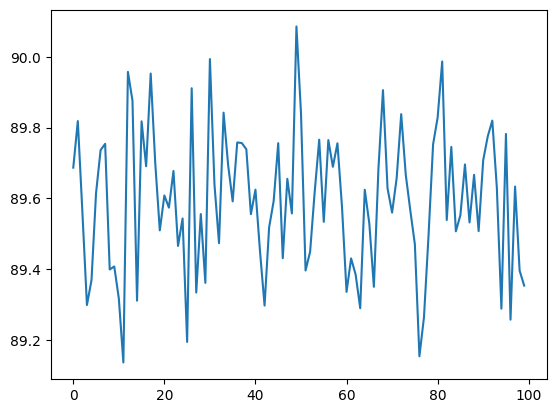

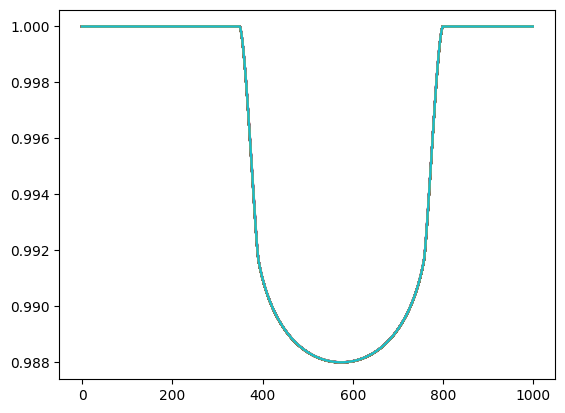

In [25]:
import copy
print(model.results['model_samples'].m['signal'].m['transit'].transit_params[0][0])
val = [x[0].i for x in model.results['model_samples'].m['signal'].m['transit'].transit_params]
plt.figure()
plt.plot(val)
plt.figure()
for v in val:
    T = copy.deepcopy(model.results['model_samples'].m['signal'].m['transit'].transit_params[0][0])
    T.Rp = 0.1
    T.i = v
    plt.plot(T.light_curve(np.linspace(0,7,1000)))

In [21]:
T=inferred_data[0].diagnostics['transit_params'][0]
T=model.results['model_mean'].m['signal'].m['transit'].transit_params[0][0]
T.Rp = 0.1
plt.plot(T.light_curve(np.linspace(0,7,10000)))
print(T)
#print(model.results['model_mean'].m['signal'].m['transit'].transit_params[0][0])

TypeError: 'NoneType' object is not subscriptable

/tmp/ipykernel_8047/2943539913.py:17: RuntimeWarning: invalid value encountered in divide
  plt.semilogy(1-(mod_curve2-base_curve)/(mod_curve-base_curve))


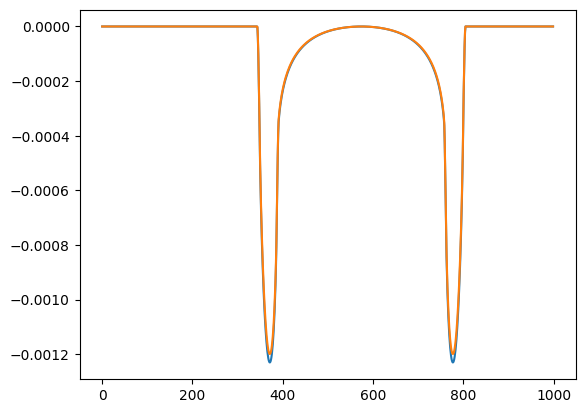

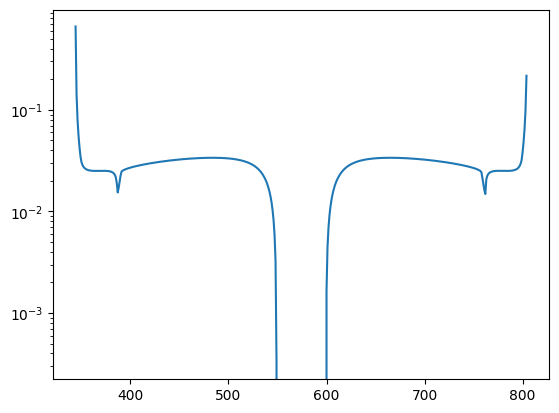

In [37]:
import copy
plt.figure()
T = copy.deepcopy(model.results['model_samples'].m['signal'].m['transit'].transit_params[0][0])
T.Rp = 0.1
base_curve = T.light_curve(np.linspace(0,7,1000))
T = copy.deepcopy(model.results['model_samples'].m['signal'].m['transit'].transit_params[0][0])
T.Rp = 0.1
T.P += 1
mod_curve = T.light_curve(np.linspace(0,7,1000))
plt.plot(mod_curve-base_curve)
T = copy.deepcopy(model.results['model_samples'].m['signal'].m['transit'].transit_params[0][0])
T.Rp = 0.1
T.sma += -0.105
mod_curve2 = T.light_curve(np.linspace(0,7,1000))
plt.plot(mod_curve2-base_curve)
plt.figure()
plt.semilogy(1-(mod_curve2-base_curve)/(mod_curve-base_curve))